In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
dftrain=pd.read_csv("train.csv")
dftest=pd.read_csv("test.csv")

In [3]:
dftrain_copy=dftrain.copy()

In [4]:
dftrain_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [5]:
dftrain.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [6]:
from statistics import mean ,median , mode

In [7]:
dftrain_copy.drop(["id","Name"],axis=1,inplace=True)

In [8]:
numeric_features = dftrain_copy.select_dtypes(include="number")
dftrain_copy[numeric_features.columns] = numeric_features.apply(lambda col: col.fillna(col.mean()))

# Fill NaN values in categorical features with the mode of each column
categorial_features = dftrain_copy.select_dtypes(include="object")
dftrain_copy[categorial_features.columns] = categorial_features.apply(lambda col: col.fillna(col.mode()[0]))

In [9]:
dftrain_copy.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [10]:
dftrain_copy.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,3.142273,5.000000,7.658636,2.94494,2.000000,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,3.142273,4.000000,7.658636,2.94494,3.000000,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,Teacher,5.000000,2.998998,8.970000,2.00000,2.974404,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,3.142273,5.000000,7.658636,2.94494,1.000000,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,3.142273,1.000000,7.658636,2.94494,1.000000,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [14]:
import pandas as pd

# Assuming dftrain_copy is already defined and has the necessary columns
# Drop ID and Name columns if they still exist
dftrain_copy.drop(columns=['ID', 'Name'], inplace=True, errors='ignore')

# Select numeric and categorical features
numeric_features = dftrain_copy.select_dtypes(include="number").columns
categorical_features = dftrain_copy.select_dtypes(include="object").columns

# Fill NaN values
mean_values = dftrain_copy[numeric_features].mean()  # Calculate mean for numeric features
mode_values = dftrain_copy[categorical_features].mode().iloc[0]  # Calculate mode for categorical features

dftrain_copy[numeric_features] = dftrain_copy[numeric_features].fillna(mean_values)  # Fill NaN with mean
dftrain_copy[categorical_features] = dftrain_copy[categorical_features].fillna(mode_values)  # Fill NaN with mode

# Create dummy variables for categorical features
categorical_features_list = categorical_features.tolist()

# Create dummy variables and drop the first category
dftrain_copy_dummies = pd.get_dummies(dftrain_copy, columns=categorical_features_list, drop_first=True)

# Convert boolean to integers (0 and 1)
dftrain_copy_dummies = dftrain_copy_dummies.astype(int)

# Now dftrain_copy_dummies has NaN values filled and categorical variables converted to dummies
print(dftrain_copy_dummies.head())

   Age  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
0   49                  3              5     7                   2   
1   26                  3              4     7                   2   
2   33                  5              2     8                   2   
3   22                  3              5     7                   2   
4   30                  3              1     7                   2   

   Job Satisfaction  Work/Study Hours  Financial Stress  Depression  \
0                 2                 1                 2           0   
1                 3                 7                 3           1   
2                 2                 3                 1           1   
3                 1                10                 1           1   
4                 1                 9                 4           0   

   Gender_Male  ...  Degree_S.Pharm  Degree_S.Tech  Degree_UX/UI Designer  \
0            0  ...               0              0                      0  

In [15]:
dftrain_copy_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Columns: 344 entries, Age to Family History of Mental Illness_Yes
dtypes: int32(344)
memory usage: 184.6 MB


In [16]:
dftrain_copy_dummies.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Male,...,Degree_S.Pharm,Degree_S.Tech,Degree_UX/UI Designer,Degree_Unite,Degree_Veda,Degree_Vivaan,Degree_Vrinda,Degree_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,49,3,5,7,2,2,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26,3,4,7,2,3,7,3,1,1,...,0,0,0,0,0,0,0,0,1,0
2,33,5,2,8,2,2,3,1,1,1,...,0,0,0,0,0,0,0,0,1,0
3,22,3,5,7,2,1,10,1,1,1,...,0,0,0,0,0,0,0,0,1,1
4,30,3,1,7,2,1,9,4,0,0,...,0,0,0,0,0,0,0,0,1,1


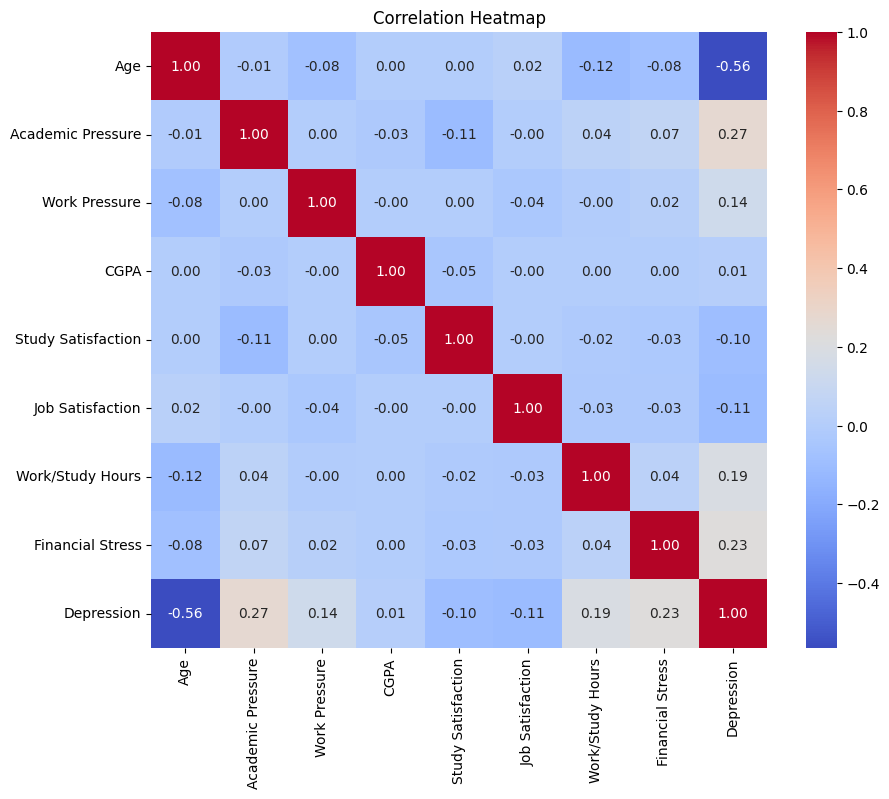

In [19]:
# Assuming numeric_features is already defined as a list or Index of numeric columns
# Compute the correlation matrix
correlation_matrix = dftrain_copy[numeric_features].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

In [21]:
X_train=dftrain_copy_dummies.drop("Depression",axis=1)
y_train=dftrain_copy_dummies["Depression"]

In [24]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)

c:\users\masud\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_predict=LR.predict(X_train)

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score
F1=f1_score(y_train,y_predict)

In [27]:
F1

0.8272916001277547

In [28]:
dftest_copy=dftest.copy()

In [29]:
dftest_copy.drop(["id","Name"],axis=1,inplace=True)

In [30]:
numeric_features_test = dftest_copy.select_dtypes(include="number")
dftest_copy[numeric_features_test.columns] = numeric_features_test.apply(lambda col: col.fillna(col.mean()))

# Fill NaN values in categorical features with the mode of each column
categorial_features_test = dftest_copy.select_dtypes(include="object")
dftest_copy[categorial_features_test.columns] = categorial_features_test.apply(lambda col: col.fillna(col.mode()[0]))

In [31]:
# Drop ID and Name columns if they still exist
dftest_copy.drop(columns=['ID', 'Name'], inplace=True, errors='ignore')

# Select numeric and categorical features
numeric_features_test = dftest_copy.select_dtypes(include="number").columns
categorical_features_test = dftest_copy.select_dtypes(include="object").columns

# Fill NaN values
mean_values = dftest_copy[numeric_features_test].mean()  # Calculate mean for numeric features
mode_values = dftest_copy[categorical_features_test].mode().iloc[0]  # Calculate mode for categorical features

dftest_copy[numeric_features_test] = dftest_copy[numeric_features_test].fillna(mean_values)  # Fill NaN with mean
dftest_copy[categorical_features_test] = dftest_copy[categorical_features_test].fillna(mode_values)  # Fill NaN with mode

# Create dummy variables for categorical features
categorical_features_list_test = categorical_features_test.tolist()

# Create dummy variables and drop the first category
dftest_copy_dummies = pd.get_dummies(dftest_copy, columns=categorical_features_list_test, drop_first=True)

# Convert boolean to integers (0 and 1)
dftest_copy_dummies = dftest_copy_dummies.astype(int)

# Now dftrain_copy_dummies has NaN values filled and categorical variables converted to dummies
print(dftest_copy_dummies.head())

   Age  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
0   53                  3              2     7                   2   
1   58                  3              2     7                   2   
2   53                  3              4     7                   2   
3   23                  5              3     6                   1   
4   47                  3              5     7                   2   

   Job Satisfaction  Work/Study Hours  Financial Stress  Gender_Male  \
0                 5                 9                 3            1   
1                 4                 6                 4            0   
2                 1                12                 4            1   
3                 2                10                 4            0   
4                 5                 3                 4            1   

   City_Aditi  ...  Degree_PhD  Degree_Pune  Degree_RCA  Degree_Rupak  \
0           0  ...           0            0           0             0   


In [37]:
X_test=dftest_copy_dummies
y_test=LR.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- City_Aditi
- City_Avni
- City_Chemist
- City_Ghopal
- City_Golkata
- ...
Feature names seen at fit time, yet now missing:
- City_Aaradhya
- City_Aditya
- City_Aishwarya
- City_Anvi
- City_Armaan
- ...


In [33]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [35]:
prediction=LR.predict(sample_submission.csv)
dfx = pd.DataFrame(predictiontestcv,columns = ['Column_A'])
dfx.to_csv('LR.csv')

NameError: name 'sample_submission' is not defined

In [38]:
xdftest_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 93800 non-null  object 
 1   Age                                    93800 non-null  float64
 2   City                                   93800 non-null  object 
 3   Working Professional or Student        93800 non-null  object 
 4   Profession                             93800 non-null  object 
 5   Academic Pressure                      93800 non-null  float64
 6   Work Pressure                          93800 non-null  float64
 7   CGPA                                   93800 non-null  float64
 8   Study Satisfaction                     93800 non-null  float64
 9   Job Satisfaction                       93800 non-null  float64
 10  Sleep Duration                         93800 non-null  object 
 11  Di

In [39]:
dftest_copy_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Columns: 279 entries, Age to Family History of Mental Illness_Yes
dtypes: int32(279)
memory usage: 99.8 MB


In [40]:
dftest_copy_dummies = dftest_copy_dummies.reindex(columns=dftrain_copy_dummies.columns, fill_value=0)

In [41]:
dftest_copy_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Columns: 344 entries, Age to Family History of Mental Illness_Yes
dtypes: int32(174), int64(170)
memory usage: 183.9 MB


In [42]:
dftrain_copy_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Columns: 344 entries, Age to Family History of Mental Illness_Yes
dtypes: int32(344)
memory usage: 184.6 MB


In [44]:
X_test=dftest_copy_dummies.drop("Depression",axis=1)
y_test=LR.predict(X_test)

In [45]:
predictiontestcv=LR.predict(X_test)
dfx = pd.DataFrame(predictiontestcv,columns = ['Column_A'])
dfx.to_csv('sample_submission.csv')

In [46]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("sample_submission.csv")

# Combine two columns (e.g., 'Column1' and 'Column2') into a new column called 'Combined'
df['Combined'] = df['id'].astype(str) + ', ' + df['Depression'].astype(str)

# Save the updated DataFrame to a new CSV file
df.to_csv("updated_file.csv", index=False)

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Assuming dftrain_copy_dummies is already defined and contains the training data
# Separate features and target
X = dftrain_copy_dummies.drop('Depression', axis=1)  # replace 'target_column' with the actual target column name
y = dftrain_copy_dummies['Depression']


# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Set up the grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
   
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its performance
best_rf_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy on validation set: ", grid_search.best_score_)

# Evaluate on the validation set
y_pred = best_rf_model.predict(X_val)
print("Accuracy on validation data:", accuracy_score(y_val, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best accuracy on validation set:  0.9305330490405117


NameError: name 'X_val' is not defined

In [48]:
y_predict_rf=rf_model.predict(X_train)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [49]:
best_rf_model = grid_search.best_estimator_

In [50]:
y_predict_rf=best_rf_model.predict(X_train)

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score
F1=f1_score(y_train,y_predict_rf)

In [52]:
F1


0.8520675717690953

In [53]:
predictiontestcv=best_rf_model.predict(X_test)
dfx = pd.DataFrame(predictiontestcv,columns = ['Column_A'])
dfx.to_csv('sample_submission.csv')